# NBA Hackathon New York City Appication
## By  Zhongheng Li - heng2j@nyu.edu 




## 3) BONUS: You should use the data provided in this LINK. Suppose you are given a sample data set of 1,000 individuals that includes their last twelve months’ worth of total revenue spend, games watched, income, fan satisfaction (self-reported, 1 to 7, 7 is best), logged complaints and number of years in our database at present (in the Training Data tab). You intend to predict spend metrics for another data set of 100 people whose revenue spend is unknown (in the Prediction tab). Construct a model for 1) A projected twelve-month total revenue sepnd number 2) The probability that total revenue spend is at least 250. Run each of the accounts in the prediction tab through both models and fill in your results in 1) the TotRevSpend column on the Prediction tab and in 2) the LikelihoodOver250 column on the Prediction tab. Please include a clearly labeled updated Excel file, any code, and any additional materials you used to generate your answer in a zip folder.

### Import modules

In [113]:
import numpy as np
import pandas as pd

from scipy.stats import entropy
import os
import json

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from decimal import *

import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12



from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### Data Preparation, Data Clearning & Data Understanding:

In [114]:
Business_Track_Application_Datasets_xlsx_file = pd.ExcelFile('data/Business-Track-Application-Datasets.xlsx')
Business_Track_Application_Datasets_xlsx_file

In [115]:
Hypothetical_Playoff_Gate_Data_df = Business_Track_Application_Datasets_xlsx_file.parse('Hypothetical Playoff Gate Data')

Training_Data_df = Business_Track_Application_Datasets_xlsx_file.parse('Training Data')
Prediction_df = Business_Track_Application_Datasets_xlsx_file.parse('Prediction')



In [116]:
Hypothetical_Playoff_Gate_Data_df = Hypothetical_Playoff_Gate_Data_df.drop(Hypothetical_Playoff_Gate_Data_df.columns[[0]], axis=1)

Hypothetical_Playoff_Gate_Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
HomeTeam       16 non-null object
Round1_Gate    16 non-null int64
Round2_Gate    16 non-null float64
Round3_Gate    16 non-null float64
Round4_Gate    16 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 720.0+ bytes


In [117]:
Hypothetical_Playoff_Gate_Data_df.describe()

,Round1_Gate,Round2_Gate,Round3_Gate,Round4_Gate
count,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01
mean,1.980547e+06,2.562839e+06,3.926989e+06,6.241867e+06
std,9.498717e+05,1.342032e+06,2.197980e+06,3.327579e+06
min,6.424090e+05,7.323463e+05,1.163562e+06,1.838427e+06
25%,1.163167e+06,1.280043e+06,2.160203e+06,3.353296e+06
50%,1.907926e+06,2.443447e+06,3.397086e+06,5.612253e+06
75%,2.781350e+06,3.366838e+06,5.588574e+06,8.475815e+06
max,3.624169e+06,4.928870e+06,8.576234e+06,1.270153e+07


In [118]:
Hypothetical_Playoff_Gate_Data_df

,HomeTeam,Round1_Gate,Round2_Gate,Round3_Gate,Round4_Gate
0,East1,2756446,3528250.88,5.574636e+06,8.417701e+06
1,East2,722126,888214.98,1.163562e+06,1.838427e+06
2,East3,642409,732346.26,1.230342e+06,2.079278e+06
3,East4,3232910,4558403.10,7.384613e+06,1.270153e+07
4,East5,1780942,2546747.06,3.845588e+06,6.152941e+06
5,East6,1208557,1281070.42,2.216252e+06,3.435190e+06
6,East7,1026998,1201587.66,1.838429e+06,3.015024e+06
7,East8,1437278,2069680.32,2.814765e+06,4.728806e+06
8,West1,3624169,4928869.84,8.576234e+06,1.132231e+07
9,West2,1660090,1992108.00,2.848714e+06,4.814327e+06


In [119]:
Training_Data_df = Training_Data_df.drop(Training_Data_df.columns[[0]], axis=1)

Training_Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
TotRevSpend        1000 non-null int64
DistToArena        1000 non-null int64
GamesWatched       1000 non-null int64
Income             1000 non-null int64
FanSatisfaction    1000 non-null int64
YrsInDatabase      1000 non-null int64
FanComplaints      1000 non-null int64
dtypes: int64(7)
memory usage: 54.8 KB


In [120]:
Training_Data_df.head(30)

,TotRevSpend,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints
0,590,8,17,140610,7,9,1
1,122,73,9,83976,1,9,3
2,772,8,12,244366,6,15,0
3,910,22,10,203798,2,9,4
4,936,2,37,34955,5,20,0
5,242,438,2,61517,5,2,1
6,94,679,1,80045,2,7,1
7,444,88,25,187777,6,6,2
8,459,35,5,119811,2,11,2
9,996,32,15,101069,4,15,5


In [121]:
Training_Data_df.describe()

,TotRevSpend,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,484.661000,451.132000,23.358000,108883.379000,2.954000,9.060000,6.061000
std,295.712973,242.659354,11.610712,51680.749719,1.555089,4.498515,6.259909
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,233.000000,268.000000,14.000000,68192.750000,2.000000,6.000000,1.750000
50%,481.000000,468.500000,23.000000,111185.000000,3.000000,9.000000,4.000000
75%,741.500000,626.500000,33.000000,148422.000000,4.000000,13.000000,8.000000
max,999.000000,1000.000000,49.000000,244366.000000,7.000000,20.000000,27.000000


In [122]:
Prediction_df = Prediction_df.drop(Prediction_df.columns[[0]], axis=1)
Prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
TotRevSpend          0 non-null float64
LikelihoodOver250    0 non-null float64
DistToArena          100 non-null float64
GamesWatched         100 non-null float64
Income               100 non-null float64
FanSatisfaction      100 non-null int64
YrsInDatabase        100 non-null float64
FanComplaints        100 non-null int64
dtypes: float64(6), int64(2)
memory usage: 6.3 KB


In [123]:
Prediction_df.head(30)

,TotRevSpend,LikelihoodOver250,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints
0,NaN,NaN,65.432342,17.15,112408.36,4,8.6,7
1,NaN,NaN,866.849829,26.95,197936.46,4,13.0,4
2,NaN,NaN,415.742495,24.01,175943.52,4,8.0,20
3,NaN,NaN,648.024215,41.65,241922.34,4,9.8,20
4,NaN,NaN,370.643909,1.96,151506.92,4,9.4,7
5,NaN,NaN,95.424164,14.70,102633.72,3,12.8,20
6,NaN,NaN,333.891485,20.09,19549.28,4,13.8,18
7,NaN,NaN,974.441884,28.42,131957.64,6,8.0,13
8,NaN,NaN,714.331609,38.71,73309.80,3,0.6,23
9,NaN,NaN,793.339728,46.06,63535.16,3,10.8,20


In [124]:
Prediction_df.describe()

,TotRevSpend,LikelihoodOver250,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints
count,0.0,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,NaN,NaN,560.600495,24.583300,121938.634000,3.420000,10.008000,13.470000
std,NaN,NaN,297.927124,12.307981,68184.488044,1.759132,4.469598,6.981151
min,NaN,NaN,6.794488,1.470000,2443.660000,1.000000,0.600000,0.000000
25%,NaN,NaN,294.671482,15.557500,63535.160000,2.000000,7.150000,7.000000
50%,NaN,NaN,601.521258,24.500000,116073.850000,3.000000,9.700000,13.500000
75%,NaN,NaN,836.256343,32.217500,180830.840000,5.000000,13.450000,19.000000
max,NaN,NaN,994.168494,49.000000,244366.000000,7.000000,19.400000,27.000000


In [125]:
Prediction_TotRevSpend_df = Prediction_df.drop(Prediction_df.columns[[1]], axis=1)
Prediction_TotRevSpend_df.describe()

,TotRevSpend,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints
count,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,NaN,560.600495,24.583300,121938.634000,3.420000,10.008000,13.470000
std,NaN,297.927124,12.307981,68184.488044,1.759132,4.469598,6.981151
min,NaN,6.794488,1.470000,2443.660000,1.000000,0.600000,0.000000
25%,NaN,294.671482,15.557500,63535.160000,2.000000,7.150000,7.000000
50%,NaN,601.521258,24.500000,116073.850000,3.000000,9.700000,13.500000
75%,NaN,836.256343,32.217500,180830.840000,5.000000,13.450000,19.000000
max,NaN,994.168494,49.000000,244366.000000,7.000000,19.400000,27.000000


In [126]:
Prediction_LikelihoodOver250_df = Prediction_df.drop(Prediction_df.columns[[0]], axis=1)
Prediction_LikelihoodOver250_df.describe()

,LikelihoodOver250,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints
count,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,NaN,560.600495,24.583300,121938.634000,3.420000,10.008000,13.470000
std,NaN,297.927124,12.307981,68184.488044,1.759132,4.469598,6.981151
min,NaN,6.794488,1.470000,2443.660000,1.000000,0.600000,0.000000
25%,NaN,294.671482,15.557500,63535.160000,2.000000,7.150000,7.000000
50%,NaN,601.521258,24.500000,116073.850000,3.000000,9.700000,13.500000
75%,NaN,836.256343,32.217500,180830.840000,5.000000,13.450000,19.000000
max,NaN,994.168494,49.000000,244366.000000,7.000000,19.400000,27.000000


### Add new features to Training_Data_df

In [127]:
# --- New feature Over250 to indicate the if this account has at least $250 in total Revenue Spend -- #

# Getting the ages in years from created_at
Over250 = []
for i in Training_Data_df["TotRevSpend"]:
    if i >= 250:
        spend = 1; 
    else:
        spend = 0; 

    Over250.append(spend)


In [128]:
Training_Data_df["Over250"] = Over250

In [129]:
Training_Data_df.head(30)

,TotRevSpend,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints,Over250
0,590,8,17,140610,7,9,1,1
1,122,73,9,83976,1,9,3,0
2,772,8,12,244366,6,15,0,1
3,910,22,10,203798,2,9,4,1
4,936,2,37,34955,5,20,0,1
5,242,438,2,61517,5,2,1,0
6,94,679,1,80045,2,7,1,0
7,444,88,25,187777,6,6,2,1
8,459,35,5,119811,2,11,2,1
9,996,32,15,101069,4,15,5,1


### Prepare training and testing dataframes

In [130]:
for a in range(1000):
    randomized_Data = Training_Data_df.reindex(np.random.permutation(Training_Data_df.index))

train_df = randomized_Data[:int((len(randomized_Data)+1)*.80)]
test_df = randomized_Data[int((len(randomized_Data)+1)*.80):] 


In [131]:
train_df.head(30)

,TotRevSpend,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints,Over250
933,263,743,37,69716,4,14,8,1
729,606,331,15,122386,3,12,7,1
102,66,550,33,10821,4,12,4,0
707,0,779,24,107188,3,3,7,0
201,894,68,35,99091,4,9,8,1
280,341,400,9,148667,2,4,7,1
88,0,604,8,91784,1,1,23,0
423,182,926,26,11076,2,7,6,0
653,526,468,22,82241,3,4,8,1
310,903,29,30,142322,1,11,11,1


In [132]:
train_df.describe()

,TotRevSpend,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints,Over250
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000
mean,485.623750,454.255000,23.281250,109737.936250,2.975000,9.00625,6.101250,0.736250
std,296.852959,243.032649,11.802596,51794.565543,1.560423,4.54968,6.275167,0.440941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,229.750000,270.750000,14.000000,69592.250000,2.000000,5.00000,2.000000,0.000000
50%,481.000000,468.500000,23.000000,112106.000000,3.000000,9.00000,4.000000,1.000000
75%,743.000000,632.500000,33.000000,148546.250000,4.000000,12.25000,8.000000,1.000000
max,999.000000,1000.000000,49.000000,244366.000000,7.000000,20.00000,27.000000,1.000000


In [133]:
test_df.head(30)

,TotRevSpend,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints,Over250
531,346,294,25,36186,2,13,8,1
495,612,446,43,75194,5,12,1,1
345,305,560,31,46254,4,8,5,1
970,609,660,32,199828,3,16,8,1
195,590,424,44,148394,4,7,8,1
432,230,581,33,63014,4,12,1,0
523,262,835,24,77821,3,6,8,1
536,708,615,35,78273,2,17,0,1
33,971,39,14,119774,2,9,6,1
241,652,290,21,58649,2,14,1,1


In [134]:
test_df.describe()

,TotRevSpend,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints,Over250
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,480.810000,438.640000,23.665000,105465.150000,2.87000,9.275000,5.900000,0.735000
std,291.812795,241.361674,10.831871,51208.951227,1.53456,4.292025,6.211515,0.442441
min,0.000000,5.000000,1.000000,7317.000000,0.00000,0.000000,0.000000,0.000000
25%,235.250000,266.750000,15.000000,62272.250000,2.00000,6.000000,1.000000,0.000000
50%,469.500000,468.000000,23.500000,103833.500000,3.00000,10.000000,4.500000,1.000000
75%,738.250000,604.500000,33.000000,146124.500000,4.00000,13.000000,8.000000,1.000000
max,999.000000,981.000000,49.000000,225354.000000,7.00000,20.000000,27.000000,1.000000


### Traning Models - Random Forest

In [135]:
#Create the Predicting Variables and Targeting Variables for Traning and Test sets
X_train_clf = train_df.drop(['Over250','TotRevSpend'], 1)
Y_train_clf = train_df['Over250']


X_test_clf = test_df.drop(['Over250','TotRevSpend'], 1)
Y_test_clf = test_df['Over250']

In [145]:
## Train the random forest model and get the accuracy
RandomForest_clf = RandomForestClassifier(n_estimators=50, oob_score=True, criterion = "entropy")
RandomForest_clf.fit(X_train_clf, Y_train_clf)
RandomForest_clf_predicted = RandomForest_clf.predict(X_test_clf)

accuracy_score(Y_test_clf,RandomForest_clf_predicted)

0.81999999999999995

With Random Forest, we have the the ~0.82% accuracy to predict if the individual will spend more than 250 dollars 

In [146]:
RandomForest_clf_predicted_Prob = RandomForest_clf.predict_proba(X_test_clf)[:,1]

In [147]:
RandomForest_clf_predicted_Prob 

array([ 0.96,  0.96,  0.96,  1.  ,  0.96,  0.92,  0.28,  0.98,  1.  ,
        1.  ,  0.22,  0.06,  1.  ,  0.42,  0.6 ,  0.64,  1.  ,  0.96,
        1.  ,  0.7 ,  1.  ,  0.6 ,  0.66,  0.52,  0.82,  1.  ,  0.96,
        0.28,  0.96,  1.  ,  0.92,  0.68,  0.2 ,  0.66,  1.  ,  0.8 ,
        1.  ,  0.9 ,  0.64,  1.  ,  0.68,  0.74,  0.32,  0.78,  1.  ,
        0.12,  0.72,  0.8 ,  1.  ,  0.04,  1.  ,  0.34,  0.14,  1.  ,
        0.94,  1.  ,  1.  ,  1.  ,  1.  ,  0.76,  0.24,  0.32,  0.54,
        1.  ,  0.14,  0.56,  0.84,  1.  ,  0.06,  1.  ,  1.  ,  1.  ,
        1.  ,  0.46,  0.98,  0.66,  0.94,  0.92,  1.  ,  0.46,  0.92,
        0.46,  1.  ,  1.  ,  1.  ,  0.16,  1.  ,  0.64,  1.  ,  0.8 ,
        0.98,  0.56,  0.98,  0.86,  1.  ,  0.94,  0.94,  0.7 ,  0.2 ,
        0.74,  1.  ,  1.  ,  0.9 ,  1.  ,  0.72,  1.  ,  0.66,  0.8 ,
        0.06,  0.94,  0.74,  0.98,  0.02,  0.98,  0.48,  0.9 ,  0.92,
        0.98,  0.58,  1.  ,  0.06,  0.24,  1.  ,  0.74,  0.8 ,  0.72,
        0.8 ,  0.4 ,

### Traning Models - SVM

In [ ]:
## Train the random forest model and get the accuracy
svc= SVC(kernel='linear',probability=True)
svc.fit(X_train,Y_train)
preds_svc = svc.predict_proba(X_test)[:,1]

In [ ]:
preds_svc

### Data Preprocessing

In [148]:
Training_Data_df_array = Training_Data_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
Training_Data_df_scaled = min_max_scaler.fit_transform(Training_Data_df_array)

Training_Data_normalized_df = pd.DataFrame(Training_Data_df_scaled, columns=Training_Data_df.columns, index=Training_Data_df.index)


Training_Data_normalized_df.head(10)

/Users/zhonghengli/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


,TotRevSpend,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints,Over250
0,0.590591,0.008,0.346939,0.575407,1.000000,0.45,0.037037,1.0
1,0.122122,0.073,0.183673,0.343648,0.142857,0.45,0.111111,0.0
2,0.772773,0.008,0.244898,1.000000,0.857143,0.75,0.000000,1.0
3,0.910911,0.022,0.204082,0.833987,0.285714,0.45,0.148148,1.0
4,0.936937,0.002,0.755102,0.143044,0.714286,1.00,0.000000,1.0
5,0.242242,0.438,0.040816,0.251741,0.714286,0.10,0.037037,0.0
6,0.094094,0.679,0.020408,0.327562,0.285714,0.35,0.037037,0.0
7,0.444444,0.088,0.510204,0.768425,0.857143,0.30,0.074074,1.0
8,0.459459,0.035,0.102041,0.490293,0.285714,0.55,0.074074,1.0
9,0.996997,0.032,0.306122,0.413597,0.571429,0.75,0.185185,1.0


In [149]:
Prediction_LikelihoodOver250_df_X = Prediction_LikelihoodOver250_df.drop(Prediction_LikelihoodOver250_df.columns[[0]], axis=1)

Prediction_LikelihoodOver250_df_X.describe()

,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,560.600495,24.583300,121938.634000,3.420000,10.008000,13.470000
std,297.927124,12.307981,68184.488044,1.759132,4.469598,6.981151
min,6.794488,1.470000,2443.660000,1.000000,0.600000,0.000000
25%,294.671482,15.557500,63535.160000,2.000000,7.150000,7.000000
50%,601.521258,24.500000,116073.850000,3.000000,9.700000,13.500000
75%,836.256343,32.217500,180830.840000,5.000000,13.450000,19.000000
max,994.168494,49.000000,244366.000000,7.000000,19.400000,27.000000


In [150]:
Prediction_LikelihoodOver250_df_X_array = Prediction_LikelihoodOver250_df_X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()

Prediction_LikelihoodOver250_df_X_scaled = min_max_scaler.fit_transform(Prediction_LikelihoodOver250_df_X_array)

Prediction_LikelihoodOver250_X_normalized_df = pd.DataFrame(Prediction_LikelihoodOver250_df_X_scaled, columns=Prediction_LikelihoodOver250_df_X.columns, index=Prediction_LikelihoodOver250_df_X.index)


Prediction_LikelihoodOver250_X_normalized_df.head(10)

,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints
0,0.059388,0.329897,0.454545,0.500000,0.425532,0.259259
1,0.871053,0.536082,0.808081,0.500000,0.659574,0.148148
2,0.414177,0.474227,0.717172,0.500000,0.393617,0.740741
3,0.649429,0.845361,0.989899,0.500000,0.489362,0.740741
4,0.368502,0.010309,0.616162,0.500000,0.468085,0.259259
5,0.089763,0.278351,0.414141,0.333333,0.648936,0.740741
6,0.331280,0.391753,0.070707,0.500000,0.702128,0.666667
7,0.980021,0.567010,0.535354,0.833333,0.393617,0.481481
8,0.716585,0.783505,0.292929,0.333333,0.000000,0.851852
9,0.796603,0.938144,0.252525,0.333333,0.542553,0.740741


### Traning Models - Linear regression

In [188]:
#Create the Predicting Variables and Targeting Variables for Traning and Test sets
X_train_reg = train_df.drop(['Over250','TotRevSpend'], 1)
Y_train_reg = train_df['TotRevSpend']


X_test_reg = test_df.drop(['Over250','TotRevSpend'], 1)
Y_test_reg = test_df['TotRevSpend']

In [196]:
LinearRegr = linear_model.LinearRegression()
LinearRegr.fit(X_train_reg, Y_train_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [197]:
LinearRegr.score(X_test_reg, Y_test_reg) 

0.53953256330165833

With Linear regression, we have ~54% of accuracy to predict how much money each individual will spend.

In [154]:
LinearRegr_Predicted = LinearRegr.predict(X_test_reg)

LinearRegr_Predicted

array([  559.36487024,   679.79975743,   420.16734534,   655.64592373,
         659.71171745,   516.07015796,   211.54672411,   589.46741333,
         626.46634576,   581.98445719,   263.28008278,    90.8472046 ,
         818.64401376,   224.48189692,   284.49775608,   359.61666796,
         704.5094994 ,   611.95576865,   759.65889981,   522.50633448,
         764.97286226,   419.95222404,   581.67116457,   121.14216486,
         446.39197086,   692.82426538,   497.54609695,   201.49190976,
         546.0889758 ,   713.1133366 ,   618.98462704,   107.1979743 ,
         223.70985166,   422.88450929,   829.59653676,   512.8503812 ,
         863.95223361,   580.13784651,   449.98473485,   841.59952533,
         365.97799143,   320.75880457,   103.49821903,   379.07917017,
         637.37427912,   278.53675661,   444.87869773,   356.79703492,
         752.63190776,   304.61602958,   556.90706094,   207.62522794,
         289.58191347,   755.17645329,   462.3073288 ,   858.39242795,
      

### Traning Models - Lasso Regression

In [155]:
def print_score(alg, score, params):
    print('%s score is %f with params %s' % (alg, score, json.dumps(params)))

In [156]:
for a in np.arange(8., 10., 0.1):
    lasso = linear_model.Lasso(alpha=a, max_iter=2000)
    lasso.fit(X_train_reg, Y_train_reg)
    print_score('Lasso', lasso.score(X_test_reg, Y_test_reg), {'alpha': a})

Lasso score is 0.539162 with params {"alpha": 8.0}
Lasso score is 0.539151 with params {"alpha": 8.1}
Lasso score is 0.539140 with params {"alpha": 8.2}
Lasso score is 0.539129 with params {"alpha": 8.299999999999999}
Lasso score is 0.539118 with params {"alpha": 8.399999999999999}
Lasso score is 0.539107 with params {"alpha": 8.499999999999998}
Lasso score is 0.539095 with params {"alpha": 8.599999999999998}
Lasso score is 0.539083 with params {"alpha": 8.699999999999998}
Lasso score is 0.539072 with params {"alpha": 8.799999999999997}
Lasso score is 0.539060 with params {"alpha": 8.899999999999997}
Lasso score is 0.539048 with params {"alpha": 8.999999999999996}
Lasso score is 0.539035 with params {"alpha": 9.099999999999996}
Lasso score is 0.539023 with params {"alpha": 9.199999999999996}
Lasso score is 0.539010 with params {"alpha": 9.299999999999995}
Lasso score is 0.538998 with params {"alpha": 9.399999999999995}
Lasso score is 0.538985 with params {"alpha": 9.499999999999995}
La

In [157]:
#regr = linear_model.Lasso()

lasso_regr = linear_model.Lasso(alpha=8.999, max_iter=2000)
lasso.fit(X_train_reg, Y_train_reg)

Lasso(alpha=9.8999999999999932, copy_X=True, fit_intercept=True,
   max_iter=2000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [158]:
scores = [lasso_regr.fit(X_train_reg, Y_train_reg).score(X_test_reg, Y_test_reg)]

In [159]:
scores

[0.53904774689347468]

With Lasso regression, we have ~54% of accuracy to predict how much money each individual will spend.

In [160]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 531 to 949
Data columns (total 8 columns):
TotRevSpend        200 non-null int64
DistToArena        200 non-null int64
GamesWatched       200 non-null int64
Income             200 non-null int64
FanSatisfaction    200 non-null int64
YrsInDatabase      200 non-null int64
FanComplaints      200 non-null int64
Over250            200 non-null int64
dtypes: int64(8)
memory usage: 24.1 KB


In [161]:
test_df.head(10)

,TotRevSpend,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints,Over250
531,346,294,25,36186,2,13,8,1
495,612,446,43,75194,5,12,1,1
345,305,560,31,46254,4,8,5,1
970,609,660,32,199828,3,16,8,1
195,590,424,44,148394,4,7,8,1
432,230,581,33,63014,4,12,1,0
523,262,835,24,77821,3,6,8,1
536,708,615,35,78273,2,17,0,1
33,971,39,14,119774,2,9,6,1
241,652,290,21,58649,2,14,1,1


In [163]:
X_test_reg.head(10)

,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints
531,294,25,36186,2,13,8
495,446,43,75194,5,12,1
345,560,31,46254,4,8,5
970,660,32,199828,3,16,8
195,424,44,148394,4,7,8
432,581,33,63014,4,12,1
523,835,24,77821,3,6,8
536,615,35,78273,2,17,0
33,39,14,119774,2,9,6
241,290,21,58649,2,14,1


In [164]:
test_df.head(10)

,TotRevSpend,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints,Over250
531,346,294,25,36186,2,13,8,1
495,612,446,43,75194,5,12,1,1
345,305,560,31,46254,4,8,5,1
970,609,660,32,199828,3,16,8,1
195,590,424,44,148394,4,7,8,1
432,230,581,33,63014,4,12,1,0
523,262,835,24,77821,3,6,8,1
536,708,615,35,78273,2,17,0,1
33,971,39,14,119774,2,9,6,1
241,652,290,21,58649,2,14,1,1


### Traning Models - Ridge Regression

In [166]:
for a in np.arange(1600., 1601., 0.05):
    ridge_regr = linear_model.Ridge(alpha=a, max_iter=2000)
    ridge_regr.fit(X_train_reg, Y_train_reg)
    print_score('Lasso', ridge_regr.score(X_test_reg, Y_test_reg), {'alpha': a})

Lasso score is 0.536903 with params {"alpha": 1600.0}
Lasso score is 0.536903 with params {"alpha": 1600.05}
Lasso score is 0.536903 with params {"alpha": 1600.1}
Lasso score is 0.536903 with params {"alpha": 1600.1499999999999}
Lasso score is 0.536903 with params {"alpha": 1600.1999999999998}
Lasso score is 0.536903 with params {"alpha": 1600.2499999999998}
Lasso score is 0.536903 with params {"alpha": 1600.2999999999997}
Lasso score is 0.536903 with params {"alpha": 1600.3499999999997}
Lasso score is 0.536903 with params {"alpha": 1600.3999999999996}
Lasso score is 0.536903 with params {"alpha": 1600.4499999999996}
Lasso score is 0.536903 with params {"alpha": 1600.4999999999995}
Lasso score is 0.536903 with params {"alpha": 1600.5499999999995}
Lasso score is 0.536903 with params {"alpha": 1600.5999999999995}
Lasso score is 0.536902 with params {"alpha": 1600.6499999999994}
Lasso score is 0.536902 with params {"alpha": 1600.6999999999994}
Lasso score is 0.536902 with params {"alpha":

In [167]:
ridge_regr = linear_model.Ridge(alpha=1600.7, max_iter=2000)
ridge_regr.fit(X_train_reg, Y_train_reg)

Ridge(alpha=1600.7, copy_X=True, fit_intercept=True, max_iter=2000,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [168]:
scores = [ridge_regr.fit(X_train_reg, Y_train_reg).score(X_test_reg, Y_test_reg)]

In [169]:
scores

[0.53690237156654952]

With Ridge regression, we have ~54% of accuracy to predict how much money each individual will spend.

In [170]:
linear_model_Y = ridge_regr.predict(X_test_reg)
ridge_regr_Predict_Y = linear_model_Y.round(decimals=0)
ridge_regr_Predict_Y



array([  558.,   664.,   412.,   641.,   655.,   506.,   208.,   590.,
         640.,   589.,   255.,   120.,   811.,   209.,   266.,   360.,
         697.,   616.,   760.,   500.,   786.,   406.,   581.,   113.,
         465.,   691.,   505.,   202.,   535.,   710.,   637.,   106.,
         251.,   439.,   843.,   512.,   854.,   586.,   428.,   826.,
         382.,   328.,   119.,   405.,   643.,   261.,   460.,   339.,
         744.,   305.,   551.,   207.,   296.,   742.,   446.,   843.,
         705.,   729.,   804.,   384.,   377.,   327.,   352.,   665.,
         216.,   245.,   531.,   852.,    73.,   975.,   819.,   763.,
         567.,   395.,   623.,   540.,   390.,   447.,   780.,   383.,
         560.,   261.,   782.,   653.,   532.,   179.,   620.,   431.,
         768.,   297.,   701.,   351.,   694.,   595.,   666.,   492.,
         657.,   239.,   164.,   435.,   789.,   680.,   667.,   606.,
         519.,   836.,   313.,   390.,   417.,   634.,   422.,   556.,
      

In [171]:
ridge_regr.coef_

array([ -5.16335911e-01,   6.97336488e+00,   1.03079998e-03,
         6.00679888e+00,   1.61146721e+01,  -2.39805827e+00])

### Traning Models - Random Forest with normalized df

In [172]:
for a in range(1000):
    randomized_Data = Training_Data_normalized_df.reindex(np.random.permutation(Training_Data_normalized_df.index))

train_normalized_df = randomized_Data[:int((len(randomized_Data)+1)*.80)]
test_normalized_df = randomized_Data[int((len(randomized_Data)+1)*.80):] 


In [173]:
#Create the Predicting Variables and Targeting Variables for Traning and Test sets
X_normalized_train = train_normalized_df.drop(['Over250','TotRevSpend'], 1)
Y_normalized_train = train_normalized_df['Over250']

X_normalized_test = test_normalized_df.drop(['Over250','TotRevSpend'], 1)
Y_normalized_test = test_normalized_df['Over250']

In [174]:
RandomForest_clf = RandomForestClassifier(n_estimators=80, oob_score=True, criterion = "entropy")
RandomForest_clf.fit(X_normalized_train, Y_normalized_train)
RandomForest_Predicted = RandomForest_clf.predict(X_normalized_test)

accuracy_score(Y_normalized_test,RandomForest_Predicted)

0.84999999999999998

Random Forest with normalized df, we have ~85% of accuracy to predict if the individual will spend more than 250 dollars 

In [175]:
# check the accuracy on the training set with the test set data
preds_RandomForest_normalized = RandomForest_clf.predict_proba(X_normalized_test)[:,1]

preds_RandomForest_normalized

array([ 0.8625,  1.    ,  0.6625,  0.475 ,  0.9625,  0.7375,  0.525 ,
        1.    ,  0.6375,  0.9625,  0.9   ,  1.    ,  0.9625,  1.    ,
        0.975 ,  0.7625,  1.    ,  1.    ,  0.85  ,  0.975 ,  0.9875,
        0.4   ,  0.9375,  1.    ,  0.5875,  1.    ,  0.9625,  0.675 ,
        1.    ,  1.    ,  0.6875,  1.    ,  0.95  ,  0.5375,  0.4375,
        1.    ,  1.    ,  0.9125,  0.2375,  0.9125,  1.    ,  1.    ,
        0.5875,  1.    ,  0.425 ,  0.3   ,  1.    ,  0.2   ,  0.8375,
        0.9875,  0.9625,  0.25  ,  0.975 ,  1.    ,  1.    ,  1.    ,
        0.9625,  1.    ,  0.7625,  0.975 ,  0.9875,  1.    ,  1.    ,
        0.7   ,  1.    ,  0.7   ,  0.575 ,  0.125 ,  0.6125,  0.5125,
        0.1625,  0.125 ,  1.    ,  1.    ,  1.    ,  0.175 ,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ,  0.45  ,  1.    ,  0.5875,
        0.675 ,  1.    ,  1.    ,  0.9125,  1.    ,  0.55  ,  1.    ,
        0.75  ,  0.55  ,  0.6625,  0.9375,  0.5625,  0.2125,  1.    ,
        0.1125,  0.6

### Traning Models - Logistic Regression

In [176]:
# Compare the accuracy score with one more model, the logistic regression model

LogisticRegression_clf = LogisticRegression()
LogisticRegression_clf = LogisticRegression_clf.fit(X_normalized_train, Y_normalized_train)

LogisticRegression_Predicted = LogisticRegression_clf.predict(X_normalized_test)

accuracy_score(Y_normalized_test,LogisticRegression_Predicted)




0.82999999999999996

Logistic Regression with normalized df, we have ~83% of accuracy to predict if the individual will spend more than 250 dollars 

In [177]:
LogisticRegression_clf_predicted_Prob = LogisticRegression_clf.predict_proba(X_normalized_test)[:,1]


In [178]:
LogisticRegression_clf_predicted_Prob

array([ 0.90645804,  0.79154634,  0.54504487,  0.69995949,  0.86070507,
        0.76890602,  0.63932503,  0.93590457,  0.77505055,  0.90072361,
        0.82240797,  0.83721069,  0.81887588,  0.98094865,  0.92659324,
        0.54275172,  0.97892915,  0.91570866,  0.80477007,  0.94180947,
        0.9285318 ,  0.34214813,  0.96828587,  0.98579302,  0.25235868,
        0.98988887,  0.89333439,  0.61013885,  0.9710424 ,  0.95377506,
        0.67032553,  0.95416693,  0.97119416,  0.57831113,  0.39830685,
        0.94153278,  0.98252056,  0.94009631,  0.34983345,  0.9256657 ,
        0.94497795,  0.95642117,  0.85771932,  0.9773413 ,  0.3188144 ,
        0.89554988,  0.95530909,  0.24830797,  0.92505461,  0.73896204,
        0.94845535,  0.33479947,  0.94980244,  0.96999858,  0.96155264,
        0.97733648,  0.80148407,  0.91056488,  0.77892546,  0.95909814,
        0.90683487,  0.98068199,  0.9562491 ,  0.82052892,  0.97630974,
        0.70272365,  0.92978089,  0.25018837,  0.71227291,  0.49

In [179]:
Prediction_df_X = Prediction_df.drop(['TotRevSpend','LikelihoodOver250'],1)

Prediction_df_X.head(30)

,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints
0,65.432342,17.15,112408.36,4,8.6,7
1,866.849829,26.95,197936.46,4,13.0,4
2,415.742495,24.01,175943.52,4,8.0,20
3,648.024215,41.65,241922.34,4,9.8,20
4,370.643909,1.96,151506.92,4,9.4,7
5,95.424164,14.70,102633.72,3,12.8,20
6,333.891485,20.09,19549.28,4,13.8,18
7,974.441884,28.42,131957.64,6,8.0,13
8,714.331609,38.71,73309.80,3,0.6,23
9,793.339728,46.06,63535.16,3,10.8,20


### 1) A projected twelve-month total revenue sepnd number 

After evaluated different models to predict the total revenue spend number with the given data, we pick Linear Regression model to predict the total revenue spending number since it has the highest of 53.9% so far.

In [203]:
## Append and show the predicted revenue spend number 
linear_model_Y = LinearRegr.predict(Prediction_df_X)
Final_Predict_Y_with_ridge_regr = linear_model_Y.round(decimals=0)


Prediction_LikelihoodOver250_df['TotRevSpend'] = Final_Predict_Y_with_ridge_regr
Prediction_LikelihoodOver250_df.head(30)


,LikelihoodOver250,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints,TotRevSpend
0,1.0000,65.432342,17.15,112408.36,4,8.6,7,648.0
1,0.7000,866.849829,26.95,197936.46,4,13.0,4,480.0
2,0.9375,415.742495,24.01,175943.52,4,8.0,20,558.0
3,0.9750,648.024215,41.65,241922.34,4,9.8,20,661.0
4,0.5375,370.643909,1.96,151506.92,4,9.4,7,443.0
5,0.9500,95.424164,14.70,102633.72,3,12.8,20,652.0
6,0.7250,333.891485,20.09,19549.28,4,13.8,18,521.0
7,0.2625,974.441884,28.42,131957.64,6,8.0,13,300.0
8,0.5750,714.331609,38.71,73309.80,3,0.6,23,256.0
9,0.7875,793.339728,46.06,63535.16,3,10.8,20,443.0


### 2) The probability that total revenue spend is at least $250

In [204]:
## Append and show the predicted likelihood of total revenue spend is at least $250¶
Final_preds_RandomForest = RandomForest_clf.predict_proba(Prediction_LikelihoodOver250_X_normalized_df)[:,1]

Prediction_LikelihoodOver250_df['LikelihoodOver250'] = Final_preds_RandomForest

Prediction_LikelihoodOver250_df.head(30)

,LikelihoodOver250,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints,TotRevSpend
0,1.0000,65.432342,17.15,112408.36,4,8.6,7,648.0
1,0.7000,866.849829,26.95,197936.46,4,13.0,4,480.0
2,0.9375,415.742495,24.01,175943.52,4,8.0,20,558.0
3,0.9750,648.024215,41.65,241922.34,4,9.8,20,661.0
4,0.5375,370.643909,1.96,151506.92,4,9.4,7,443.0
5,0.9500,95.424164,14.70,102633.72,3,12.8,20,652.0
6,0.7250,333.891485,20.09,19549.28,4,13.8,18,521.0
7,0.2625,974.441884,28.42,131957.64,6,8.0,13,300.0
8,0.5750,714.331609,38.71,73309.80,3,0.6,23,256.0
9,0.7875,793.339728,46.06,63535.16,3,10.8,20,443.0


In [205]:
Prediction_LikelihoodOver250_X_normalized_df['LikelihoodOver250'] = Final_preds_RandomForest
Prediction_LikelihoodOver250_X_normalized_df.head(30)

,DistToArena,GamesWatched,Income,FanSatisfaction,YrsInDatabase,FanComplaints,LikelihoodOver250
0,0.059388,0.329897,0.454545,0.500000,0.425532,0.259259,1.0000
1,0.871053,0.536082,0.808081,0.500000,0.659574,0.148148,0.7000
2,0.414177,0.474227,0.717172,0.500000,0.393617,0.740741,0.9375
3,0.649429,0.845361,0.989899,0.500000,0.489362,0.740741,0.9750
4,0.368502,0.010309,0.616162,0.500000,0.468085,0.259259,0.5375
5,0.089763,0.278351,0.414141,0.333333,0.648936,0.740741,0.9500
6,0.331280,0.391753,0.070707,0.500000,0.702128,0.666667,0.7250
7,0.980021,0.567010,0.535354,0.833333,0.393617,0.481481,0.2625
8,0.716585,0.783505,0.292929,0.333333,0.000000,0.851852,0.5750
9,0.796603,0.938144,0.252525,0.333333,0.542553,0.740741,0.7875


### a) Given that there are only 1,000 data points, it’s likely that initial models may overfit your training data to an extent. Are there ways to combat this? Explain any alternative models you considered for each and why you selected your final models.

In [ ]:
- Model comparison by accuracy 
- Model comparison by ROC AUC for classification models
- Model comparison by R-squared values for regression models
- Compare by Cross Validation 

In [183]:
def plotUnivariateROC(preds, truth, label_string):
    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = auc(fpr, tpr)
    
    c = (np.random.rand(), np.random.rand(),np.random.rand())

    #create a plot and set some options
    plt.plot(fpr, tpr, color =c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

In [105]:
RandomForest_clf_predicted_Prob

array([ 0.54,  0.86,  0.38,  1.  ,  0.98,  0.84,  0.18,  0.68,  0.58,
        1.  ,  0.38,  0.98,  0.72,  0.98,  0.94,  0.94,  0.94,  0.98,
        0.76,  0.58,  1.  ,  0.96,  1.  ,  0.9 ,  1.  ,  0.5 ,  0.68,
        0.64,  0.62,  1.  ,  0.68,  0.84,  0.22,  1.  ,  1.  ,  0.98,
        0.38,  0.9 ,  0.84,  0.88,  0.44,  0.58,  0.78,  1.  ,  1.  ,
        0.84,  0.7 ,  0.12,  0.02,  0.86,  0.16,  0.86,  0.98,  0.58,
        1.  ,  0.02,  0.32,  1.  ,  0.62,  0.04,  1.  ,  0.22,  0.24,
        0.92,  0.96,  0.18,  0.54,  0.68,  0.46,  1.  ,  0.96,  1.  ,
        0.16,  0.04,  0.98,  0.52,  0.98,  0.78,  1.  ,  0.54,  0.46,
        1.  ,  0.98,  0.98,  0.78,  0.12,  0.98,  0.98,  0.98,  0.72,
        1.  ,  0.3 ,  0.98,  0.92,  0.5 ,  0.96,  0.96,  0.98,  1.  ,
        0.34,  0.3 ,  1.  ,  0.7 ,  0.84,  0.52,  0.74,  0.78,  0.54,
        1.  ,  0.32,  0.74,  0.04,  0.38,  0.98,  0.82,  0.9 ,  0.52,
        0.18,  0.92,  1.  ,  0.02,  0.16,  0.5 ,  1.  ,  0.98,  1.  ,
        0.76,  1.  ,

In [106]:
LogisticRegression_clf_predicted_Prob

array([ 0.98821607,  0.9338342 ,  0.17579896,  0.91930937,  0.25633992,
        0.99051833,  0.44941195,  0.62777072,  0.70922822,  0.24722268,
        0.88269244,  0.91995261,  0.22038209,  0.93559377,  0.91351543,
        0.42178962,  0.6875751 ,  0.9707471 ,  0.88386189,  0.45850319,
        0.95662991,  0.84226997,  0.1314257 ,  0.81230585,  0.83753486,
        0.7922717 ,  0.87519874,  0.61104381,  0.95233846,  0.43786516,
        0.3945166 ,  0.53642874,  0.94079577,  0.56675426,  0.77515913,
        0.92709669,  0.75486378,  0.98396398,  0.51488164,  0.92842113,
        0.85082836,  0.33514426,  0.92807292,  0.94874611,  0.97857634,
        0.96681938,  0.82711883,  0.76541396,  0.9715099 ,  0.68421362,
        0.43032657,  0.32835136,  0.92700345,  0.77313427,  0.59761446,
        0.17757265,  0.96140211,  0.98644806,  0.50451047,  0.50640406,
        0.95093628,  0.95697932,  0.15316262,  0.64656002,  0.94451769,
        0.94566454,  0.39487047,  0.80319011,  0.8284103 ,  0.52

In [1025]:
preds_svc

array([ 0.98637958,  0.2832746 ,  0.98455752,  0.19817483,  0.98845955,
        0.30443339,  0.97217764,  0.95341814,  0.95625839,  0.15757033,
        0.25277429,  0.29954813,  0.9742553 ,  0.9729547 ,  0.72934054,
        0.97989542,  0.53956338,  0.28418491,  0.90653201,  0.97002878,
        0.99355528,  0.27319666,  0.86152196,  0.74699037,  0.96846201,
        0.15623402,  0.99584229,  0.86954485,  0.9109531 ,  0.19188516,
        0.98982817,  0.2023165 ,  0.70131281,  0.83857091,  0.99047917,
        0.74780194,  0.45233203,  0.76661871,  0.93137654,  0.61313264,
        0.46376993,  0.8728903 ,  0.54749469,  0.89854508,  0.73820781,
        0.96798134,  0.89555543,  0.95646552,  0.79654819,  0.99683374,
        0.85455366,  0.84323826,  0.96691072,  0.92278163,  0.66562161,
        0.9614741 ,  0.96893585,  0.27487122,  0.90431443,  0.99205312,
        0.6479897 ,  0.57193915,  0.39573106,  0.68664868,  0.972969  ,
        0.54975856,  0.87238675,  0.56119874,  0.91120074,  0.37

0.53163907072262861

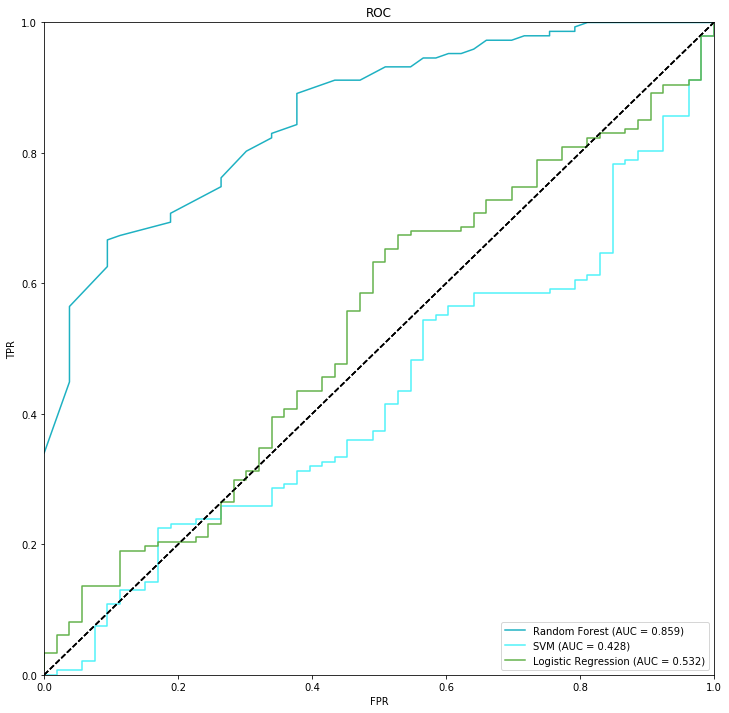

In [193]:
plotUnivariateROC(RandomForest_clf_predicted_Prob , Y_test_clf, 'Random Forest')
plotUnivariateROC(preds_svc, Y_test_clf, 'SVM')
plotUnivariateROC(LogisticRegression_clf_predicted_Prob, Y_test_clf, 'Logistic Regression')

### b) Now consider you had a much larger analogous training data set (say, 1 million records), and you rebuild your model(s) on the richer set. What metrics / methods would you consider to evaluate how well your new model(s) fit? This is a conceptual rather than computational question.

In [ ]:
- Cross Validation 

### c) Suppose that after further testing, you still found that your model overfit the training data. Generally speaking, what might you consider exploring to mitigate overfitting on this larger set?

In [ ]:
- Reduce overfitting by using feature selection 